<a href="https://colab.research.google.com/github/charlieskc/MachineLearning/blob/master/HK_Covid19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hong Kong COVID-19 Analysis

Data download from: http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv


In [1]:
#!git clone https://github.com/beoutbreakprepared/nCoV2019.git
#!cd nCoV2019 && git pull
#!tar -xvf /content/nCoV2019/latest_data/latestdata.tar.gz
!wget http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv
!wget http://www.chp.gov.hk/files/misc/latest_situation_of_reported_cases_covid_19_eng.csv
!ls -lh


--2020-08-10 01:35:42--  http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv
Resolving www.chp.gov.hk (www.chp.gov.hk)... 104.19.253.59, 104.19.254.59, 2606:4700::6813:fe3b, ...
Connecting to www.chp.gov.hk (www.chp.gov.hk)|104.19.253.59|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv [following]
--2020-08-10 01:35:42--  https://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv
Connecting to www.chp.gov.hk (www.chp.gov.hk)|104.19.253.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘enhanced_sur_covid_19_eng.csv’

enhanced_sur_covid_     [ <=>                ] 370.99K  --.-KB/s    in 0.05s   

2020-08-10 01:35:43 (7.56 MB/s) - ‘enhanced_sur_covid_19_eng.csv’ saved [379898]

--2020-08-10 01:35:45--  http://www.chp.gov.hk/files/misc/latest_situation_of_reported_cases_covid_19_eng.csv
Resolving www.chp.gov.

# Import Packages

In [2]:
#install pandas 
#!pip install pandas

#load packages
import sys 
import pandas as pd 
import matplotlib 
import numpy as np 
import scipy as sp 
import IPython
from IPython.display import display
import sklearn 
import random
import time
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model # to load the saved model

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Data Files

In [8]:
# List data files

from subprocess import check_output
print("file info:\n" + "-"*10 + "\n"+ check_output(["ls", "-l", "/content/enhanced_sur_covid_19_eng.csv"]).decode("utf8"))
print("row count:\n" + "-"*10 + "\n"+ check_output(["wc", "-l","/content/enhanced_sur_covid_19_eng.csv"]).decode("utf8"))


#import data from file: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
#data_raw = pd.read_csv('/content/latestdata.csv', dtype={"chronic_disease_binary": "object", "sequence_available": "object"})
df = pd.read_csv('/content/enhanced_sur_covid_19_eng.csv')
df1 = pd.read_csv('/content/latest_situation_of_reported_cases_covid_19_eng.csv')

ageBin= [0,4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79,84,89,94,99,104]
df['age_bins'] = pd.cut(x=df['Age'], bins=ageBin)

#preview data
df.sample(5) 


file info:
----------
-rw-r--r-- 1 root root 379898 Aug  9 15:05 /content/enhanced_sur_covid_19_eng.csv

row count:
----------
4081 /content/enhanced_sur_covid_19_eng.csv



,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable,age_bins
2621,2622,26/07/2020,23/07/2020,M,60,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed,"(59, 64]"
2167,2168,23/07/2020,20/07/2020,F,59,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed,"(54, 59]"
1222,1223,01/07/2020,Asymptomatic,M,28,NaN,Discharged,HK resident,Imported case,Confirmed,"(24, 29]"
1759,1760,18/07/2020,17/07/2020,F,66,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed,"(64, 69]"
220,221,20/03/2020,16/03/2020,M,62,NaN,Discharged,HK resident,Local case,Confirmed,"(59, 64]"


In [15]:
df.describe(include = 'all')


,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
count,4080.000000,4080,4080,4080,4080.000000,0.0,4080,4080,4080,4080
unique,NaN,161,158,2,NaN,NaN,6,5,6,2
top,NaN,30/07/2020,Asymptomatic,F,NaN,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed
freq,NaN,149,859,2052,NaN,NaN,2847,2589,1714,4079
mean,2040.500000,NaN,NaN,NaN,43.984559,NaN,NaN,NaN,NaN,NaN
std,1177.938878,NaN,NaN,NaN,20.298387,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1020.750000,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,NaN
50%,2040.500000,NaN,NaN,NaN,43.000000,NaN,NaN,NaN,NaN,NaN
75%,3060.250000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.groupby(['age_bins']).size().plot.bar()
df.groupby(['Hospitalised/Discharged/Deceased']).size().plot.bar()
df.groupby(['Gender']).size().plot.bar()


pd.crosstab(df['age_bins'],df['Gender']).plot.bar()
pd.crosstab(df['Gender'],df['Hospitalised/Discharged/Deceased']).plot.bar()


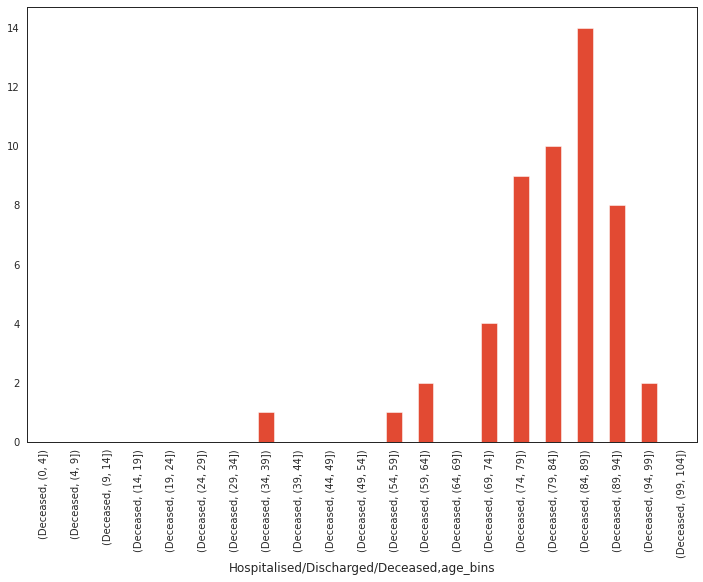

In [29]:

df_deceased = df[df['Hospitalised/Discharged/Deceased']=='Deceased']
df_deceased.groupby(['Hospitalised/Discharged/Deceased','age_bins']).size().plot.bar()





age_bins
(0, 4]       0.000000
(4, 9]       0.000000
(9, 14]      0.000000
(14, 19]     0.000000
(19, 24]     0.000000
(24, 29]     0.000000
(29, 34]     0.000000
(34, 39]     0.002778
(39, 44]     0.000000
(44, 49]     0.000000
(49, 54]     0.000000
(54, 59]     0.002755
(59, 64]     0.005764
(64, 69]     0.000000
(69, 74]     0.023952
(74, 79]     0.109756
(79, 84]     0.147059
(84, 89]     0.241379
(89, 94]     0.200000
(94, 99]     0.285714
(99, 104]    0.000000
Name: Deceased, dtype: float64


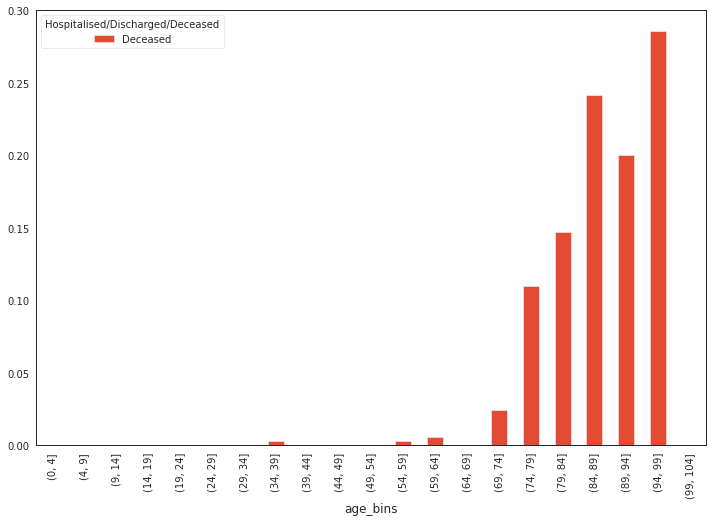

In [43]:
df_ratio = pd.crosstab(df['age_bins'],df['Hospitalised/Discharged/Deceased']).apply(lambda r: r/r.sum(), axis=1)
print (df_ratio['Deceased'])
df_ratio[['Deceased']].plot.bar()

In [10]:
#clean data
#drop ID column 
#drop_column = ['ID']

#data_raw.drop(drop_column, axis=1, inplace = True)
print (df['Case classification*'].unique())

print('Train columns with null values:\n', df.isnull().sum())
print("-"*10)


Train columns with null values:
 Case no.                               0
Report date                            0
Date of onset                          0
Gender                                 0
Age                                    0
Name of hospital admitted           4080
Hospitalised/Discharged/Deceased       0
HK/Non-HK resident                     0
Case classification*                   0
Confirmed/probable                     0
dtype: int64
----------


,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
count,4080.000000,4080,4080,4080,4080.000000,0.0,4080,4080,4080,4080
unique,NaN,161,158,2,NaN,NaN,6,5,6,2
top,NaN,30/07/2020,Asymptomatic,F,NaN,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed
freq,NaN,149,859,2052,NaN,NaN,2847,2589,1714,4079
mean,2040.500000,NaN,NaN,NaN,43.984559,NaN,NaN,NaN,NaN,NaN
std,1177.938878,NaN,NaN,NaN,20.298387,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1020.750000,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,NaN
50%,2040.500000,NaN,NaN,NaN,43.000000,NaN,NaN,NaN,NaN,NaN
75%,3060.250000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Feature Engineering Section

#one hot encoding for numerical categorial column - 1. Reason for absence, 2. Seasons, 3. Education
df_feature = pd.get_dummies(data_raw, columns=['Reason for absence','Seasons', 'Education' ], prefix = ['Absent_Reason','Season','Education'], drop_first = True)

# 1. We want to predict if the staff call off sick, the chance that he will take less than 1 day or greater than 1 day, let the target column be "absent1Day"
df_feature['absent_4hr_more'] = np.where(data_raw['Absenteeism time in hours']>=4, 1, 0)
data_raw['absent_4hr_more'] = np.where(data_raw['Absenteeism time in hours']>=4, 1, 0)

df_feature.describe(include = 'all')



,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absent_Reason_1,Absent_Reason_2,Absent_Reason_3,Absent_Reason_4,Absent_Reason_5,Absent_Reason_6,Absent_Reason_7,Absent_Reason_8,Absent_Reason_9,Absent_Reason_10,Absent_Reason_11,Absent_Reason_12,Absent_Reason_13,Absent_Reason_14,Absent_Reason_15,Absent_Reason_16,Absent_Reason_17,Absent_Reason_18,Absent_Reason_19,Absent_Reason_21,Absent_Reason_22,Absent_Reason_23,Absent_Reason_24,Absent_Reason_25,Absent_Reason_26,Absent_Reason_27,Absent_Reason_28,Season_2,Season_3,Season_4,Education_2,Education_3,Education_4,absent_4hr_more
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,6.324324,3.914865,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324,0.021622,0.001351,0.001351,0.002703,0.004054,0.010811,0.020270,0.008108,0.005405,0.033784,0.035135,0.010811,0.074324,0.025676,0.002703,0.004054,0.001351,0.028378,0.054054,0.008108,0.051351,0.201351,0.004054,0.041892,0.044595,0.093243,0.151351,0.259459,0.247297,0.263514,0.062162,0.106757,0.005405,0.458108
std,3.436287,1.421675,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998,0.145543,0.036761,0.036761,0.051952,0.063585,0.103481,0.141019,0.089740,0.073372,0.180794,0.184246,0.103481,0.262475,0.158273,0.051952,0.063585,0.036761,0.166164,0.226277,0.089740,0.220863,0.401281,0.063585,0.200478,0.206552,0.290970,0.358633,0.438635,0.431733,0.440836,0.241613,0.309013,0.073372,0.498579
min,0.000000,2.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,4.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,5.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [ ]:
Target = ['absent_4hr_more']

#data_x contains all feature columns except prediction column
data_x = df_feature[df_feature.columns.difference(['absent_4hr_more','Absenteeism time in hours'])]
#data_y is the prediction column
data_y = df_feature['absent_4hr_more']
#data_xy = Target + data_x

#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data_x, data_y, random_state = 0)
#train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
#train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

data_y.describe(include = 'all')



Data1 Shape: (740, 21)
Train1 Shape: (555, 49)
Test1 Shape: (185, 49)


count    740.000000
mean       0.458108
std        0.498579
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: absent_4hr_more, dtype: float64

#Exploratory Analysis with Statistics
Analyze the correlation between each column and absent_4hr_more (target)

In [ ]:
for x in data_x:
    if data_x[x].dtype != 'float64' :
        print('Absent more than 4hrs Correlation by:', x)
        print(df_feature[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')

Absent more than 4hrs Correlation by: Absent_Reason_1
   Absent_Reason_1  absent_4hr_more
0                0         0.447514
1                1         0.937500
---------- 

Absent more than 4hrs Correlation by: Absent_Reason_10
   Absent_Reason_10  absent_4hr_more
0                 0         0.443357
1                 1         0.880000
---------- 

Absent more than 4hrs Correlation by: Absent_Reason_11
   Absent_Reason_11  absent_4hr_more
0                 0         0.452381
1                 1         0.615385
---------- 

Absent more than 4hrs Correlation by: Absent_Reason_12
   Absent_Reason_12  absent_4hr_more
0                 0         0.456284
1                 1         0.625000
---------- 

Absent more than 4hrs Correlation by: Absent_Reason_13
   Absent_Reason_13  absent_4hr_more
0                 0         0.439416
1                 1         0.690909
---------- 

Absent more than 4hrs Correlation by: Absent_Reason_14
   Absent_Reason_14  absent_4hr_more
0                

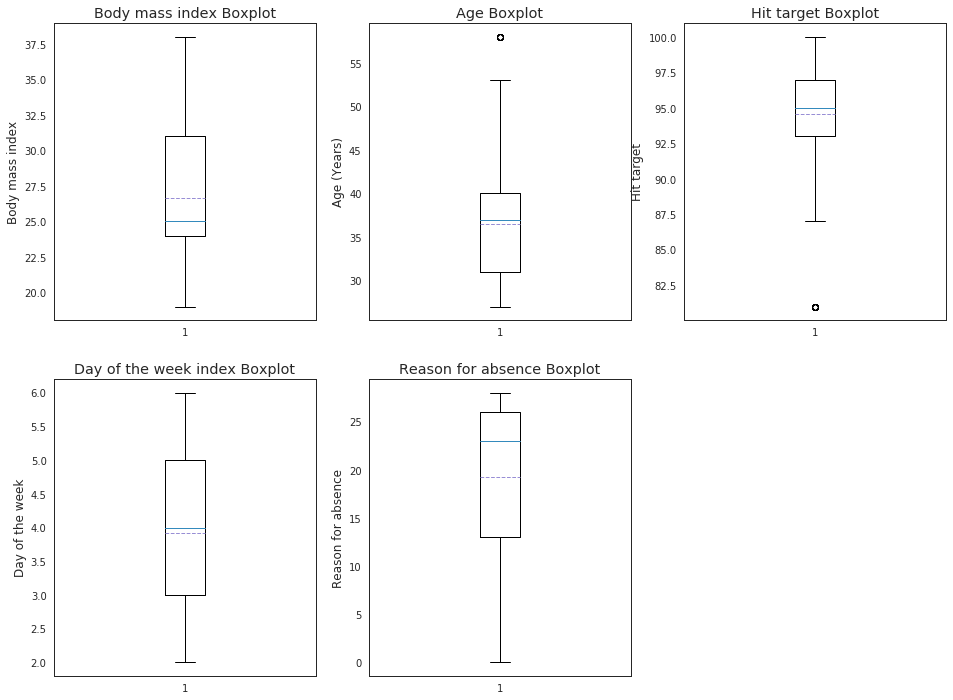

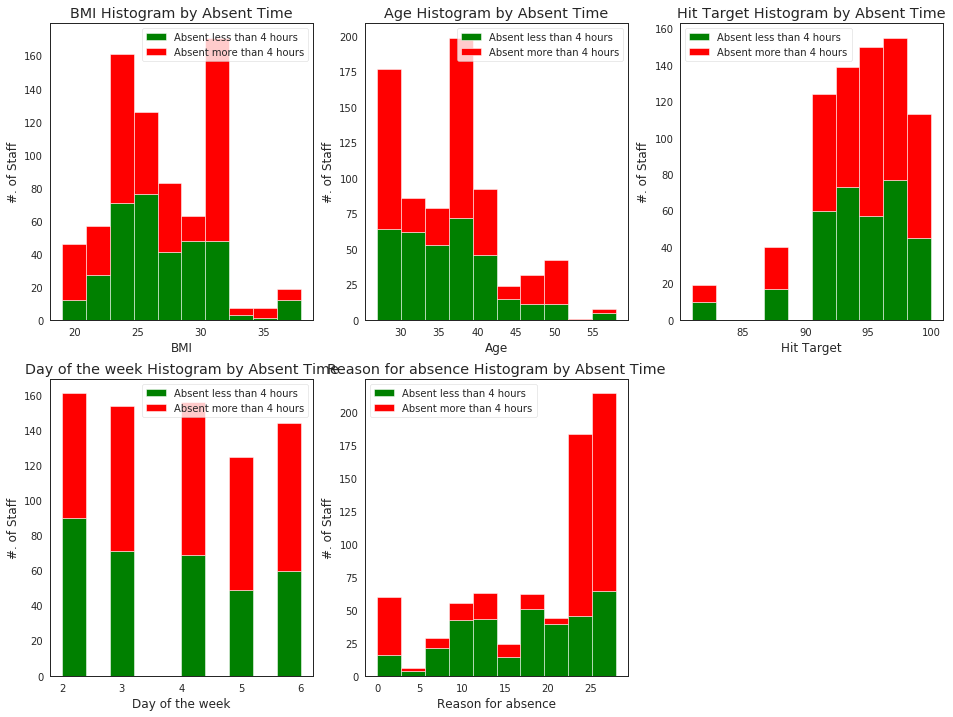

In [ ]:
#graph distribution of quantitative data
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data_raw['Body mass index'], showmeans = True, meanline = True)
plt.title('Body mass index Boxplot')
plt.ylabel('Body mass index')

plt.subplot(232)
plt.boxplot(data_raw['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data_raw['Hit target'], showmeans = True, meanline = True)
plt.title('Hit target Boxplot')
plt.ylabel('Hit target')

plt.subplot(234)
plt.boxplot(x=data_raw['Day of the week'], showmeans = True, meanline = True)
plt.title('Day of the week index Boxplot')
plt.ylabel('Day of the week')

plt.subplot(235)
plt.boxplot(x=data_raw['Reason for absence'], showmeans = True, meanline = True)
plt.title('Reason for absence Boxplot')
plt.ylabel('Reason for absence')

##############

plt.figure(figsize=[16,12])
plt.subplot(231)
plt.hist(x = [data_raw[data_raw['absent_4hr_more']==1]['Body mass index'], data_raw[data_raw['absent_4hr_more']==0]['Body mass index']], 
         stacked=True, color = ['g','r'],label = ['Absent less than 4 hours','Absent more than 4 hours'])
plt.title('BMI Histogram by Absent Time')
plt.xlabel('BMI')
plt.ylabel('#. of Staff')
plt.legend()

plt.subplot(232)
plt.hist(x = [data_raw[data_raw['absent_4hr_more']==1]['Age'], data_raw[data_raw['absent_4hr_more']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Absent less than 4 hours','Absent more than 4 hours'])
plt.title('Age Histogram by Absent Time')
plt.xlabel('Age')
plt.ylabel('#. of Staff')
plt.legend()

plt.subplot(233)
plt.hist(x = [data_raw[data_raw['absent_4hr_more']==1]['Hit target'], data_raw[data_raw['absent_4hr_more']==0]['Hit target']], 
         stacked=True, color = ['g','r'],label = ['Absent less than 4 hours','Absent more than 4 hours'])
plt.title('Hit Target Histogram by Absent Time')
plt.xlabel('Hit Target')
plt.ylabel('#. of Staff')
plt.legend()

plt.subplot(234)
plt.hist(x = [data_raw[data_raw['absent_4hr_more']==1]['Day of the week'], data_raw[data_raw['absent_4hr_more']==0]['Day of the week']], 
         stacked=True, color = ['g','r'],label = ['Absent less than 4 hours','Absent more than 4 hours'])
plt.title('Day of the week Histogram by Absent Time')
plt.xlabel('Day of the week')
plt.ylabel('#. of Staff')
plt.legend()

plt.subplot(235)
plt.hist(x = [data_raw[data_raw['absent_4hr_more']==1]['Reason for absence'], data_raw[data_raw['absent_4hr_more']==0]['Reason for absence']], 
         stacked=True, color = ['g','r'],label = ['Absent less than 4 hours','Absent more than 4 hours'])
plt.title('Reason for absence Histogram by Absent Time')
plt.xlabel('Reason for absence')
plt.ylabel('#. of Staff')
plt.legend()




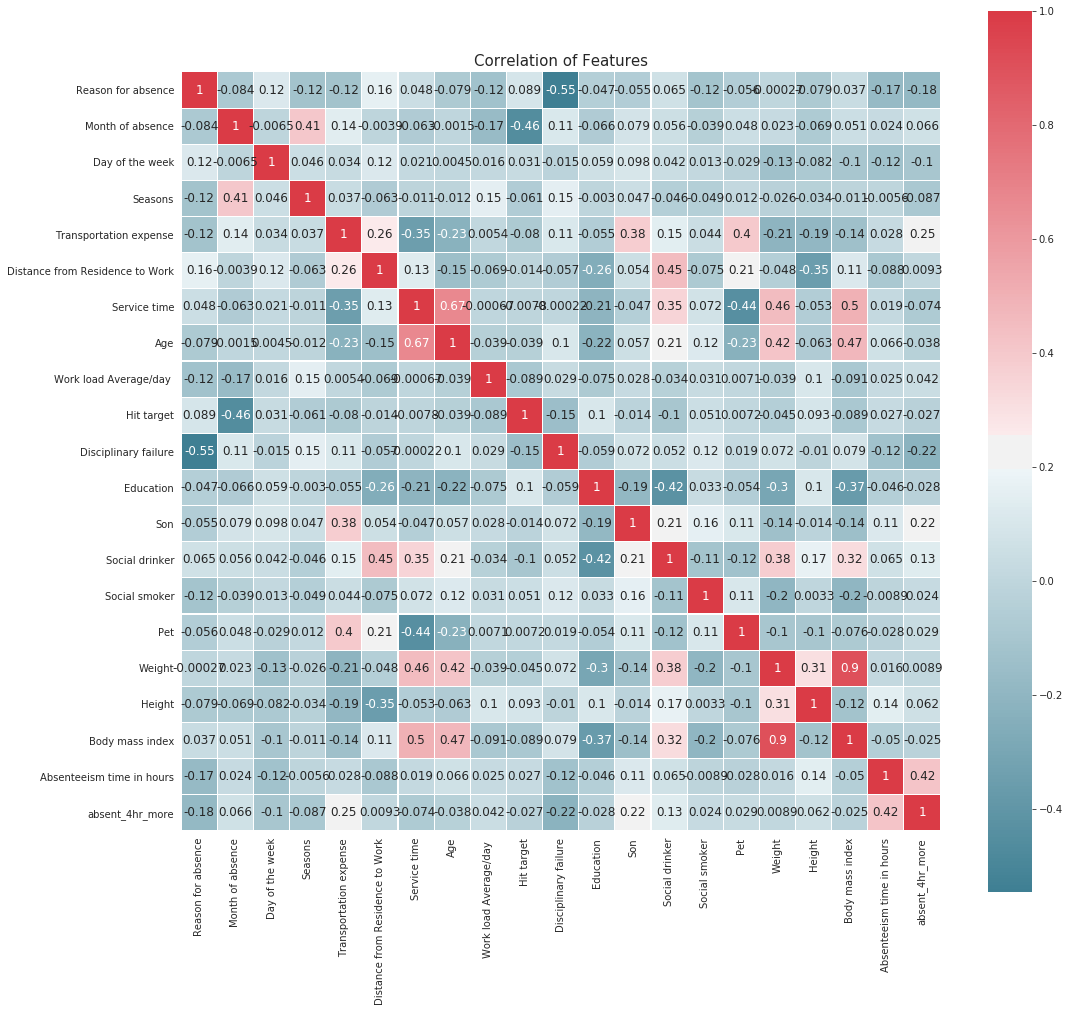

In [ ]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(17, 18))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Correlation of Features', y=1.05, size=15)

correlation_heatmap(data_raw)

In [ ]:
model = Sequential()
model.add(Dense(49, input_dim=49, activation='relu'))
model.add(Dense(98, input_dim=49, activation='relu'))
model.add(Dense(49, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])



model.fit(train1_x, train1_y, epochs=200, batch_size=10, validation_split=0.2)


# evaluate the model

scores = model.evaluate(data_x, data_y)
print("\n{}: {:.2f}".format(model.metrics_names[1],
                            scores[1]*100))



Train on 444 samples, validate on 111 samples
Epoch 1/200
444/444 [==============================] - 1s 3ms/step - loss: 1.2182 - acc: 0.5428 - val_loss: 0.9251 - val_acc: 0.5495
Epoch 2/200
444/444 [==============================] - 0s 208us/step - loss: 0.8652 - acc: 0.5811 - val_loss: 0.8902 - val_acc: 0.5405
Epoch 3/200
444/444 [==============================] - 0s 196us/step - loss: 0.8861 - acc: 0.5180 - val_loss: 0.7613 - val_acc: 0.5045
Epoch 4/200
444/444 [==============================] - 0s 190us/step - loss: 0.7373 - acc: 0.5968 - val_loss: 0.6860 - val_acc: 0.5946
Epoch 5/200
444/444 [==============================] - 0s 195us/step - loss: 0.7153 - acc: 0.6104 - val_loss: 0.9495 - val_acc: 0.4685
Epoch 6/200
444/444 [==============================] - 0s 195us/step - loss: 0.7578 - acc: 0.5676 - val_loss: 0.6768 - val_acc: 0.5766
Epoch 7/200
444/444 [==============================] - 0s 192us/step - loss: 0.7560 - acc: 0.5968 - val_loss: 0.7053 - val_acc: 0.6036
Epoch 8/200

In [ ]:
#Save model
model.save('predict.model')

# Make Prediction 
predictions = predictions = model.predict(test1_x)
rounded = [round(x[0]) for x in predictions] 
print(rounded)





[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0]
